In [1]:
import os
# from tramdag.utils.configuration import *

from tramdag import TramDagConfig
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_wine
import pandas as pd

In [3]:
experiment_name = "wine"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")
cfg=TramDagConfig()
cfg.setup_configuration(experiment_name,EXPERIMENT_DIR)

Configuration already exists: /home/bule/TramDag/dev_experiment_logs/wine/configuration.json


In [4]:
# Load the dataset
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
df=pd.DataFrame(wine['data'], columns=wine['feature_names'])
df['target']=wine['target']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [7]:
data_type={key:value for key, value in zip(train_df.columns, ['continous']*13+['ordinal_Xc_Yo'])}
cfg.set_data_type(data_type)

---------------------------------------------------------------------------------------------------------
                                       |                       MODEL SETTINGS                       
Variable             | dtype           | As Predictor                   | As Target                     
---------------------------------------------------------------------------------------------------------
alcohol              | continous       | continuous [c]                 | continuous [c]                
malic_acid           | continous       | continuous [c]                 | continuous [c]                
ash                  | continous       | continuous [c]                 | continuous [c]                
alcalinity_of_ash    | continous       | continuous [c]                 | continuous [c]                
magnesium            | continous       | continuous [c]                 | continuous [c]                
total_phenols        | continous       | continuous [c]  

/home/bule/TramDag/tramdag/utils/configuration.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


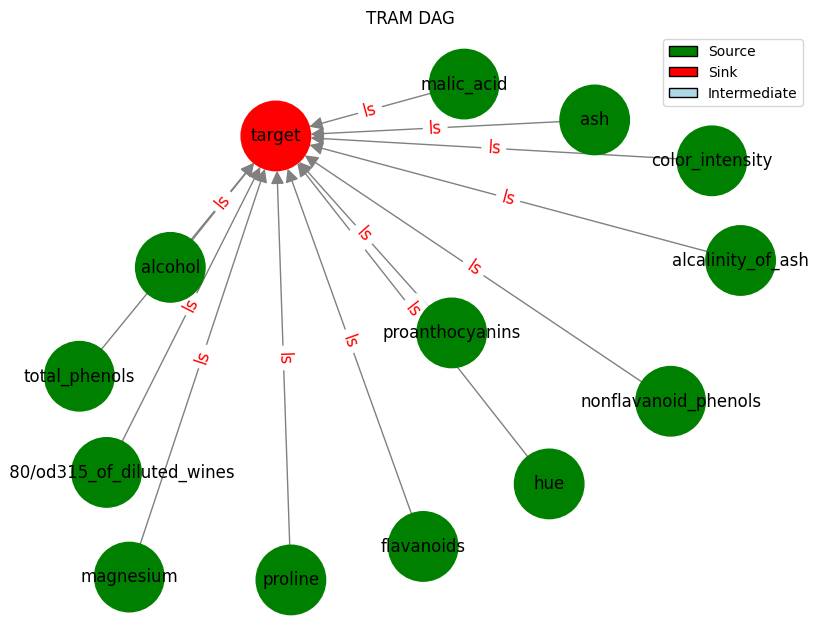

In [8]:
cfg.set_meta_adj_matrix()


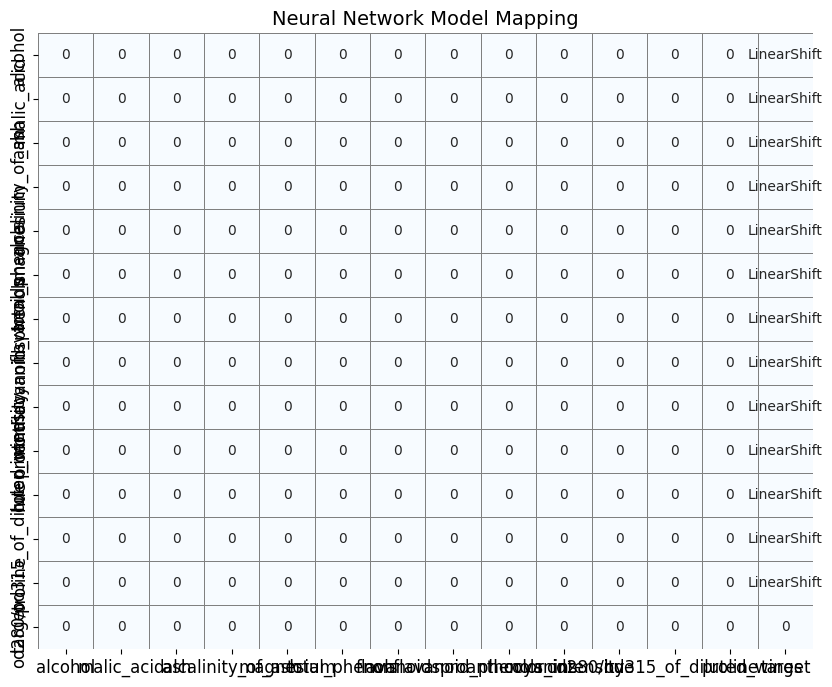

In [9]:
cfg.set_tramdag_nn_models()

# Model training & sampling

In [10]:
cfg.conf_dict

{'date_of_creation': '2025-11-09 07:41:46',
 'experiment_name': 'wine',
 'PATHS': {'DATA_PATH': '/home/bule/TramDag/dev_experiment_logs/wine',
  'LOG_DIR': None,
  'EXPERIMENT_DIR': '/home/bule/TramDag/dev_experiment_logs/wine'},
 'data_type': {'alcohol': 'continous',
  'malic_acid': 'continous',
  'ash': 'continous',
  'alcalinity_of_ash': 'continous',
  'magnesium': 'continous',
  'total_phenols': 'continous',
  'flavanoids': 'continous',
  'nonflavanoid_phenols': 'continous',
  'proanthocyanins': 'continous',
  'color_intensity': 'continous',
  'hue': 'continous',
  'od280/od315_of_diluted_wines': 'continous',
  'proline': 'continous',
  'target': 'ordinal_Xc_Yo'},
 'adj_matrix': [['0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   'ls'],
  ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'ls'],
  ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'ls'],
  ['0', '0', '0', '0', '0', '0', '0', '0', '0

In [11]:
from tramdag import TramDagModel

cfg.compute_levels(train_df)
device='cpu'

In [21]:
td_model = TramDagModel.from_config(cfg, set_initial_weights=True,verbose=True,debug=True,device=device,initial_data = train_df) 


[DEBUG] TramDagModel using device: cpu

[INFO] Building model for node 'alcohol' with settings: {'set_initial_weights': True, 'debug': True, 'verbose': True, 'device': 'cpu', 'initial_data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
158    14.34        1.68  2.70               25.0       98.0           2.80   
137    12.53        5.51  2.64               25.0       96.0           1.79   
98     12.37        1.07  2.10               18.5       88.0           3.52   
159    13.48        1.67  2.64               22.5       89.0           2.60   
38     13.07        1.50  2.10               15.5       98.0           2.40   
..       ...         ...   ...                ...        ...            ...   
71     13.86        1.51  2.67               25.0       86.0           2.95   
106    12.25        1.73  2.12               19.0       80.0           1.65   
14     14.38        1.87  2.38               12.0      102.0           3.30   
92     12.69       

In [25]:
td_model.fit(train_df, val_df,
            #  train_list=['target'],
             learning_rate=1e-2,
             epochs=250,batch_size=100,
             verbose=True,debug=False,
             device=device,
             num_workers = 8,
             persistent_workers = True,
             prefetch_factor = 8,
             train_mode = "sequential")#,

[INFO] Computing new minmax dict from training data...
[INFO] Saved new minmax dict to /home/bule/TramDag/dev_experiment_logs/wine/min_max_scaling.json
[INFO] Training 14 nodes (sequential) on cpu

[INFO] Training node 'alcohol' for 250 epochs on cpu (pid=2282656)
[INFO] Existing model found. Loading weights and history from LAST model...

[INFO] Training node 'malic_acid' for 250 epochs on cpu (pid=2282656)
[INFO] Existing model found. Loading weights and history from LAST model...

[INFO] Training node 'ash' for 250 epochs on cpu (pid=2282656)
[INFO] Existing model found. Loading weights and history from LAST model...

[INFO] Training node 'alcalinity_of_ash' for 250 epochs on cpu (pid=2282656)
[INFO] Existing model found. Loading weights and history from LAST model...

[INFO] Training node 'magnesium' for 250 epochs on cpu (pid=2282656)
[INFO] Existing model found. Loading weights and history from LAST model...

[INFO] Training node 'total_phenols' for 250 epochs on cpu (pid=2282656

[INFO] Loaded training/validation histories for 14 nodes.


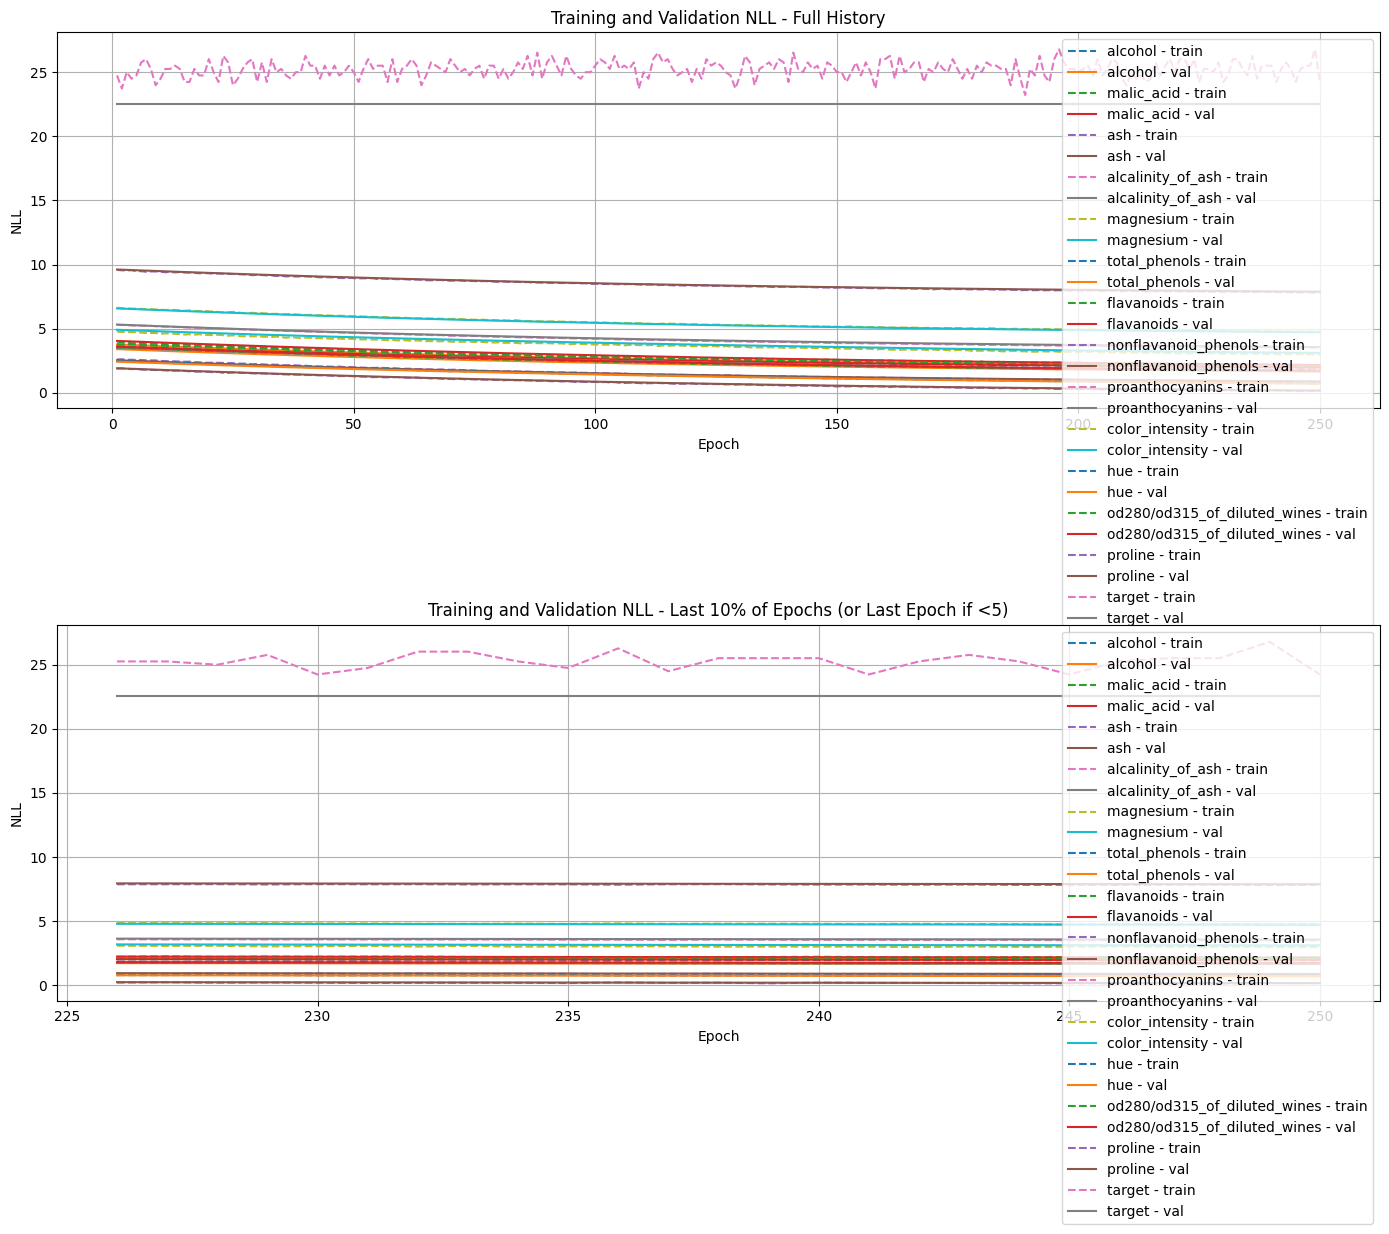

In [22]:
td_model.plot_loss_history()

[WARNING] No linear shift history found for node 'alcohol' at /home/bule/TramDag/dev_experiment_logs/wine/alcohol/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'malic_acid' at /home/bule/TramDag/dev_experiment_logs/wine/malic_acid/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'ash' at /home/bule/TramDag/dev_experiment_logs/wine/ash/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'alcalinity_of_ash' at /home/bule/TramDag/dev_experiment_logs/wine/alcalinity_of_ash/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'magnesium' at /home/bule/TramDag/dev_experiment_logs/wine/magnesium/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'total_phenols' at /home/bule/TramDag/dev_experiment_logs/wine/total_phenols/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'flavanoids' at /home/bule/TramDag/dev_experiment_log

/home/bule/TramDag/tramdag/TramDagModel.py:924: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(flatten)


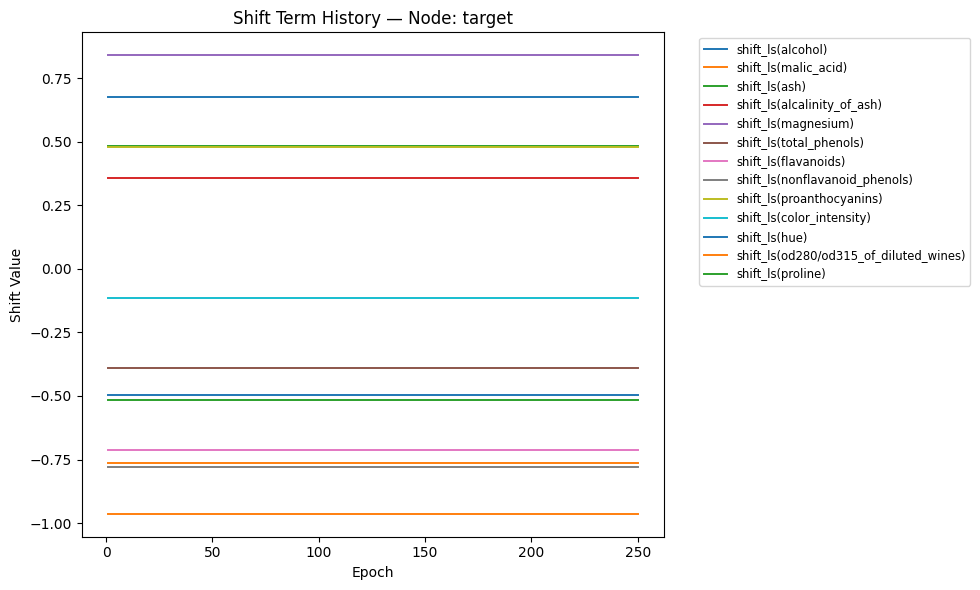

In [23]:
td_model.plot_linear_shift_history() 

[INFO] Starting full DAG sampling with 10000 samples per node.
[INFO] Deleting all previously sampled data.
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/wine/alcohol/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/wine/malic_acid/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/wine/ash/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/wine/alcalinity_of_ash/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/wine/magnesium/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/wine/total_phenols/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/wine/flavanoids/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/wine/nonflavanoid_phenols/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/wine/proanthocyanins/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/win

[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 43.28it/s]

[INFO] Completed sampling for node 'alcohol'

----*----------*-------------*--------Sample Node: malic_acid ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node malic_acid from standard logistic distribution
[INFO] Loaded best model weights for node 'malic_acid' from /home/bule/TramDag/dev_experiment_logs/wine/malic_acid/best_model.pt
[WARNING] target_col 'malic_acid' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 40.63it/s]

[INFO] Completed sampling for node 'malic_acid'

----*----------*-------------*--------Sample Node: ash ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node ash from standard logistic distribution
[INFO] Loaded best model weights for node 'ash' from /home/bule/TramDag/dev_experiment_logs/wine/ash/best_model.pt
[WARNING] target_col 'ash' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 39.06it/s]

[INFO] Completed sampling for node 'ash'

----*----------*-------------*--------Sample Node: alcalinity_of_ash ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node alcalinity_of_ash from standard logistic distribution
[INFO] Loaded best model weights for node 'alcalinity_of_ash' from /home/bule/TramDag/dev_experiment_logs/wine/alcalinity_of_ash/best_model.pt
[WARNING] target_col 'alcalinity_of_ash' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 43.16it/s]

[INFO] Completed sampling for node 'alcalinity_of_ash'

----*----------*-------------*--------Sample Node: magnesium ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node magnesium from standard logistic distribution
[INFO] Loaded best model weights for node 'magnesium' from /home/bule/TramDag/dev_experiment_logs/wine/magnesium/best_model.pt
[WARNING] target_col 'magnesium' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 36.99it/s]

[INFO] Completed sampling for node 'magnesium'

----*----------*-------------*--------Sample Node: total_phenols ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node total_phenols from standard logistic distribution
[INFO] Loaded best model weights for node 'total_phenols' from /home/bule/TramDag/dev_experiment_logs/wine/total_phenols/best_model.pt
[WARNING] target_col 'total_phenols' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 41.25it/s]

[INFO] Completed sampling for node 'total_phenols'

----*----------*-------------*--------Sample Node: flavanoids ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node flavanoids from standard logistic distribution
[INFO] Loaded best model weights for node 'flavanoids' from /home/bule/TramDag/dev_experiment_logs/wine/flavanoids/best_model.pt
[WARNING] target_col 'flavanoids' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 42.15it/s]

[INFO] Completed sampling for node 'flavanoids'

----*----------*-------------*--------Sample Node: nonflavanoid_phenols ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node nonflavanoid_phenols from standard logistic distribution
[INFO] Loaded best model weights for node 'nonflavanoid_phenols' from /home/bule/TramDag/dev_experiment_logs/wine/nonflavanoid_phenols/best_model.pt
[WARNING] target_col 'nonflavanoid_phenols' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 38.76it/s]

[INFO] Completed sampling for node 'nonflavanoid_phenols'

----*----------*-------------*--------Sample Node: proanthocyanins ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node proanthocyanins from standard logistic distribution
[INFO] Loaded best model weights for node 'proanthocyanins' from /home/bule/TramDag/dev_experiment_logs/wine/proanthocyanins/best_model.pt
[WARNING] target_col 'proanthocyanins' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 43.84it/s]

[INFO] Completed sampling for node 'proanthocyanins'

----*----------*-------------*--------Sample Node: color_intensity ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node color_intensity from standard logistic distribution
[INFO] Loaded best model weights for node 'color_intensity' from /home/bule/TramDag/dev_experiment_logs/wine/color_intensity/best_model.pt
[WARNING] target_col 'color_intensity' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 40.68it/s]

[INFO] Completed sampling for node 'color_intensity'

----*----------*-------------*--------Sample Node: hue ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node hue from standard logistic distribution
[INFO] Loaded best model weights for node 'hue' from /home/bule/TramDag/dev_experiment_logs/wine/hue/best_model.pt
[WARNING] target_col 'hue' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 41.90it/s]

[INFO] Completed sampling for node 'hue'

----*----------*-------------*--------Sample Node: od280/od315_of_diluted_wines ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node od280/od315_of_diluted_wines from standard logistic distribution
[INFO] Loaded best model weights for node 'od280/od315_of_diluted_wines' from /home/bule/TramDag/dev_experiment_logs/wine/od280/od315_of_diluted_wines/best_model.pt
[WARNING] target_col 'od280/od315_of_diluted_wines' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 42.92it/s]

[INFO] Completed sampling for node 'od280/od315_of_diluted_wines'

----*----------*-------------*--------Sample Node: proline ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node proline from standard logistic distribution
[INFO] Loaded best model weights for node 'proline' from /home/bule/TramDag/dev_experiment_logs/wine/proline/best_model.pt
[WARNING] target_col 'proline' not in DataFrame columns — is this intended to be used as a Sampler?



[INFO] Chandrupatla root finding ->  iterations:: 100%|██████████| 100/100 [00:02<00:00, 39.30it/s]

[INFO] Completed sampling for node 'proline'

----*----------*-------------*--------Sample Node: target ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node target from standard logistic distribution
[INFO] Loaded best model weights for node 'target' from /home/bule/TramDag/dev_experiment_logs/wine/target/best_model.pt
[WARNING] target_col 'target' not in DataFrame columns — is this intended to be used as a Sampler?


[INFO] Completed sampling for node 'target'
[INFO] DAG sampling completed successfully for all nodes.


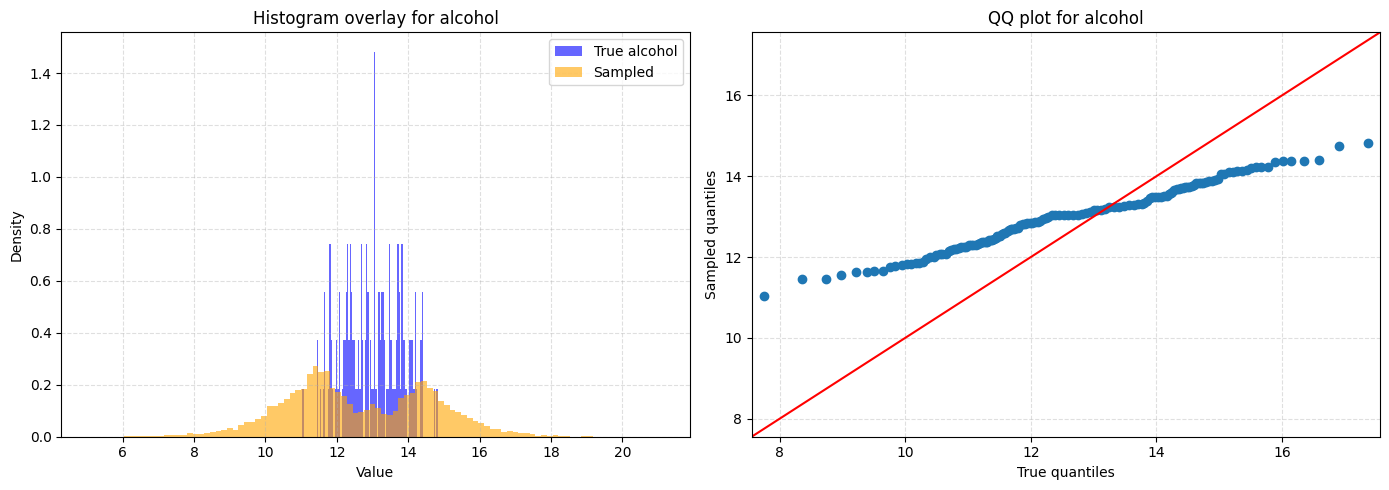

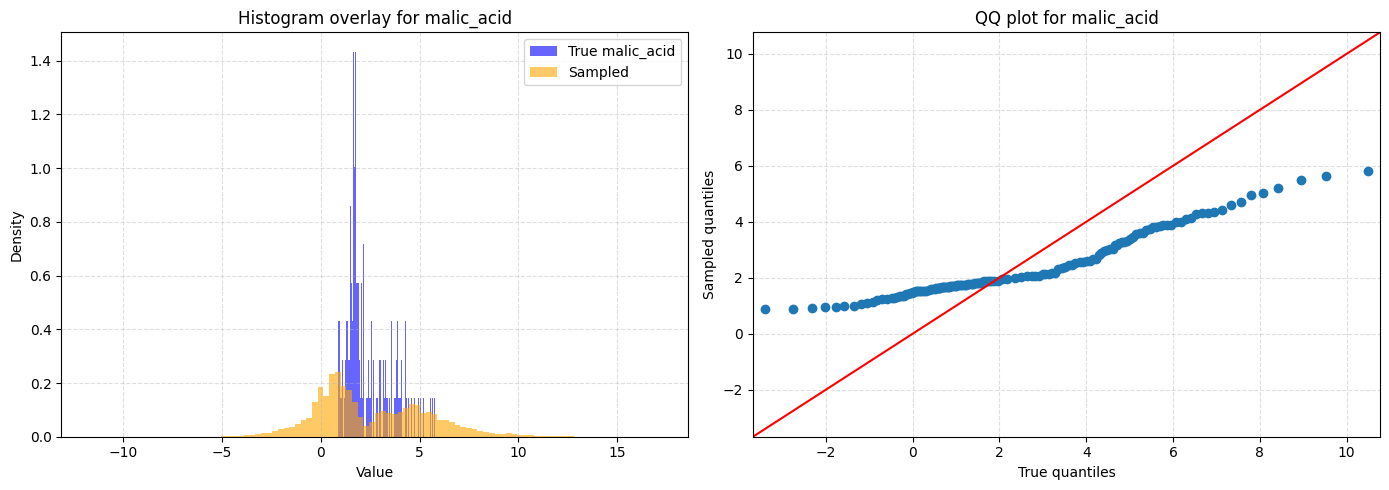

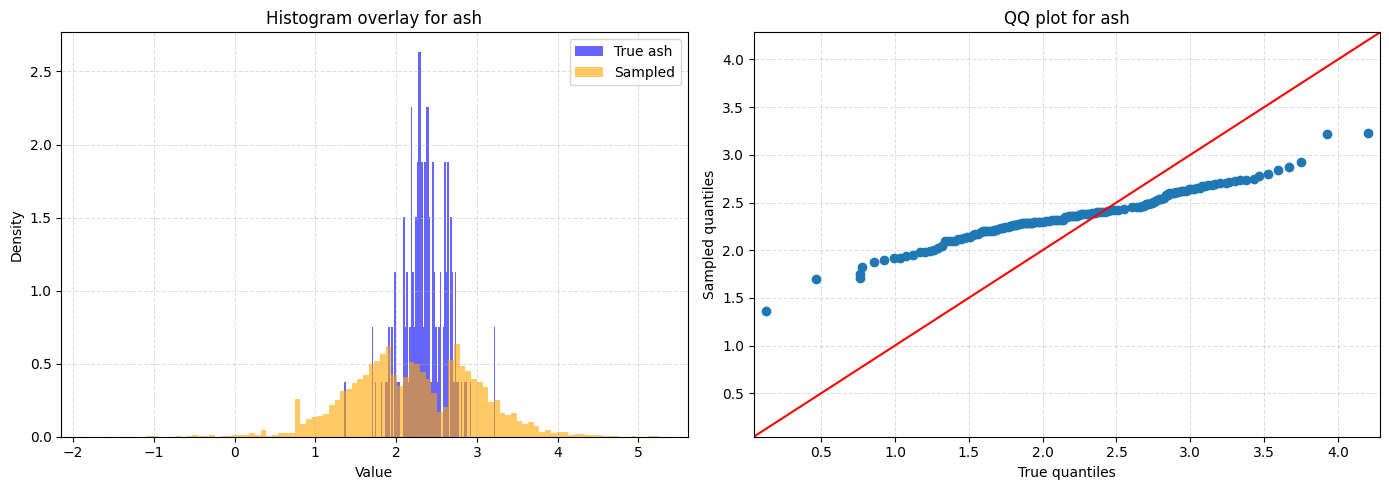

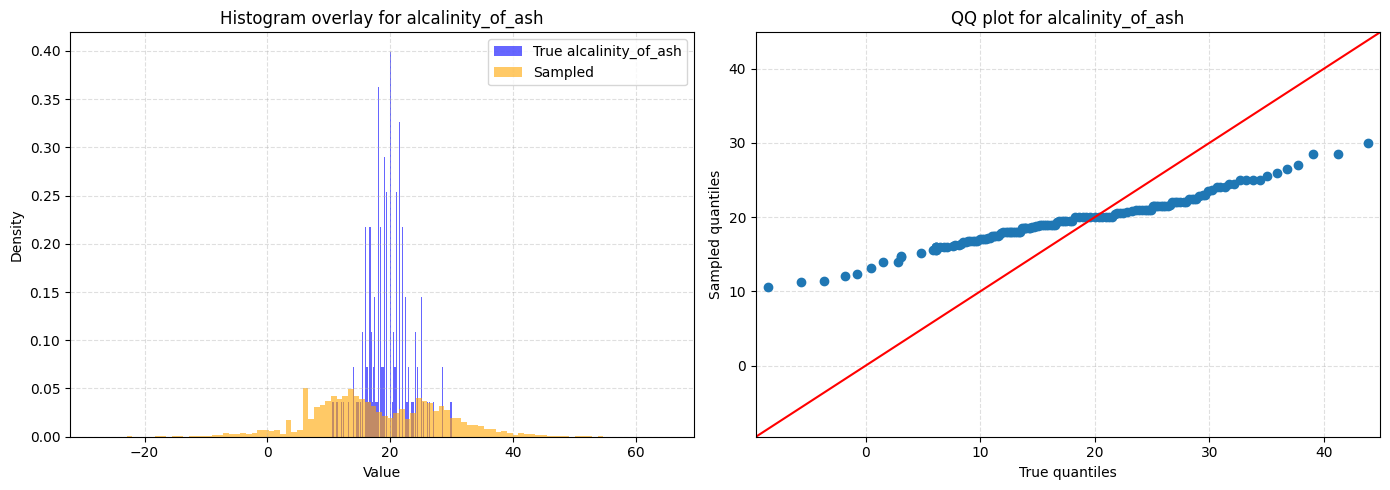

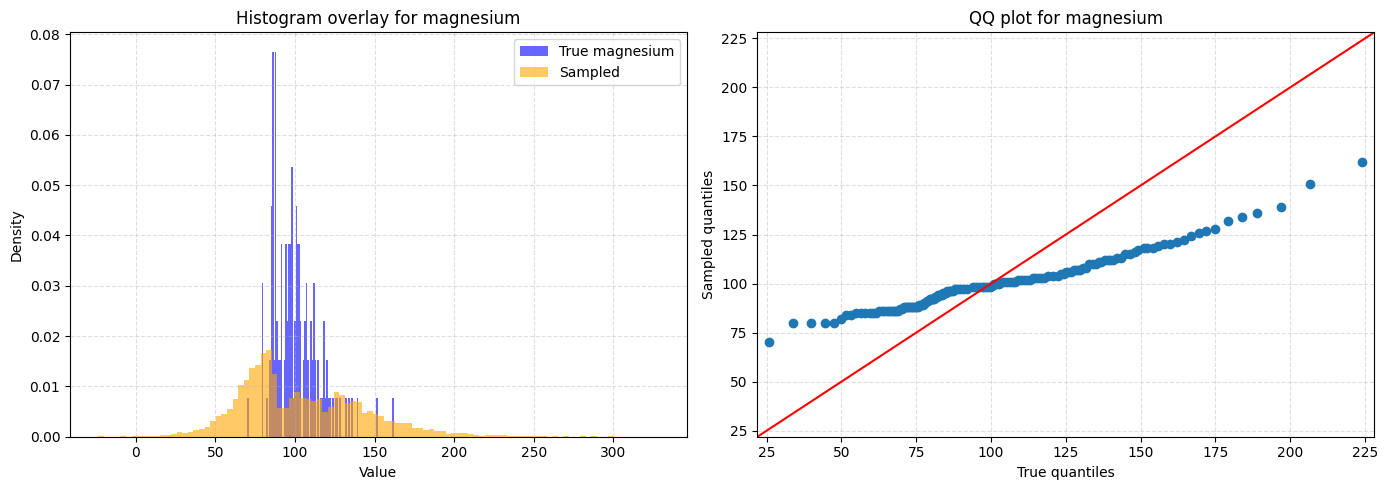

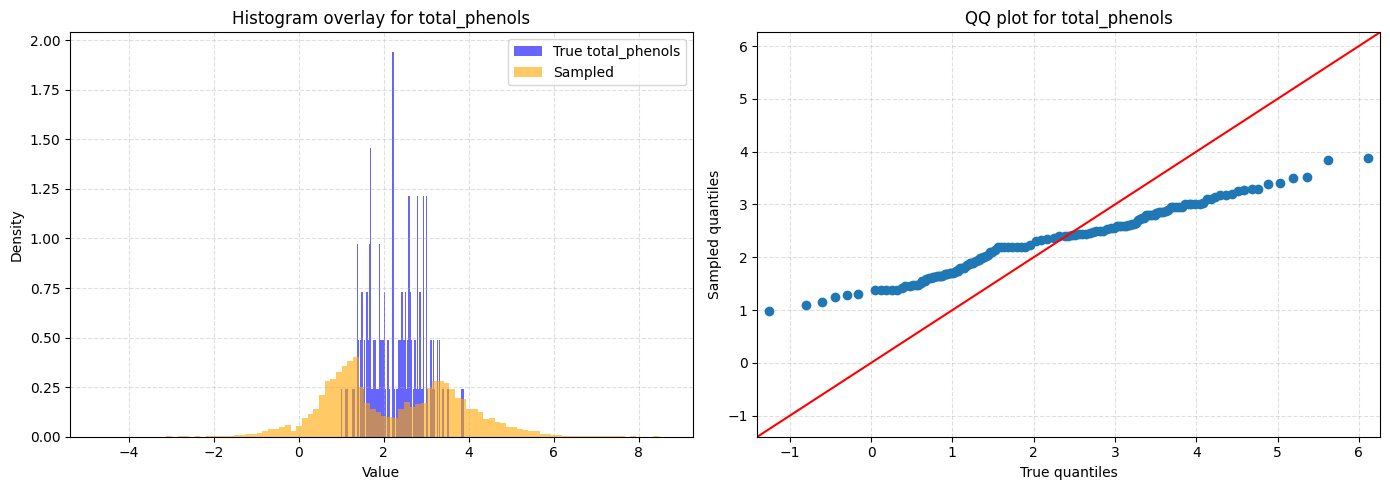

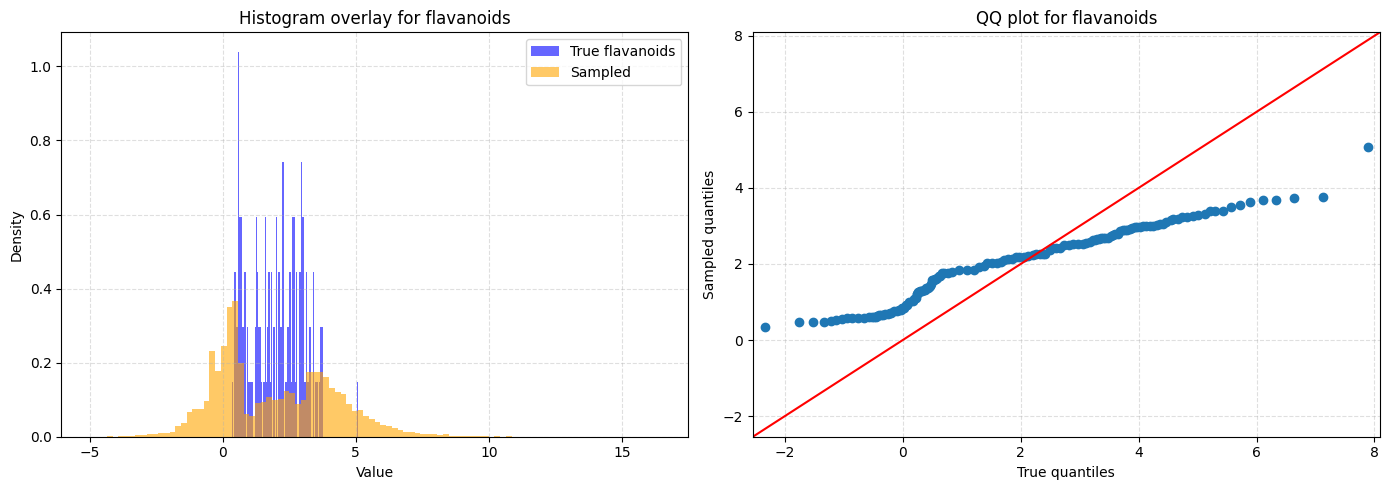

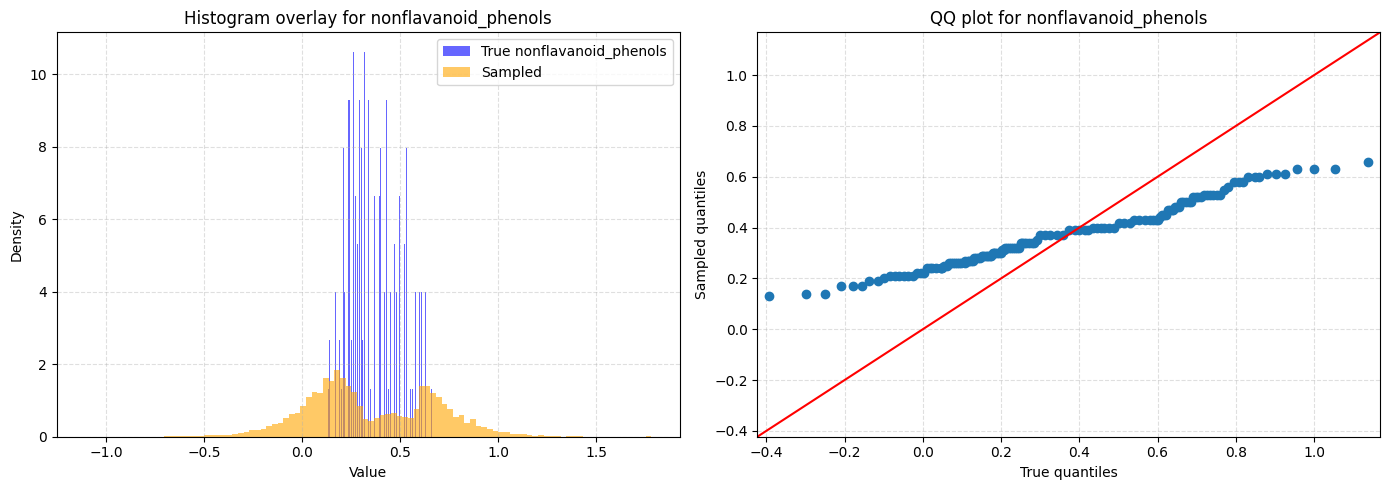

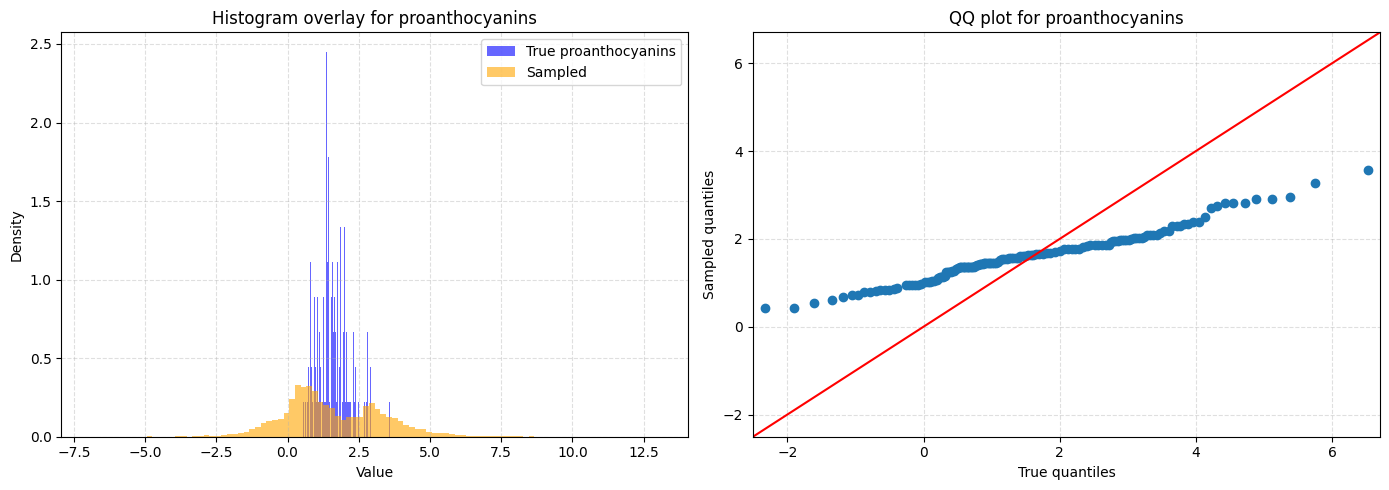

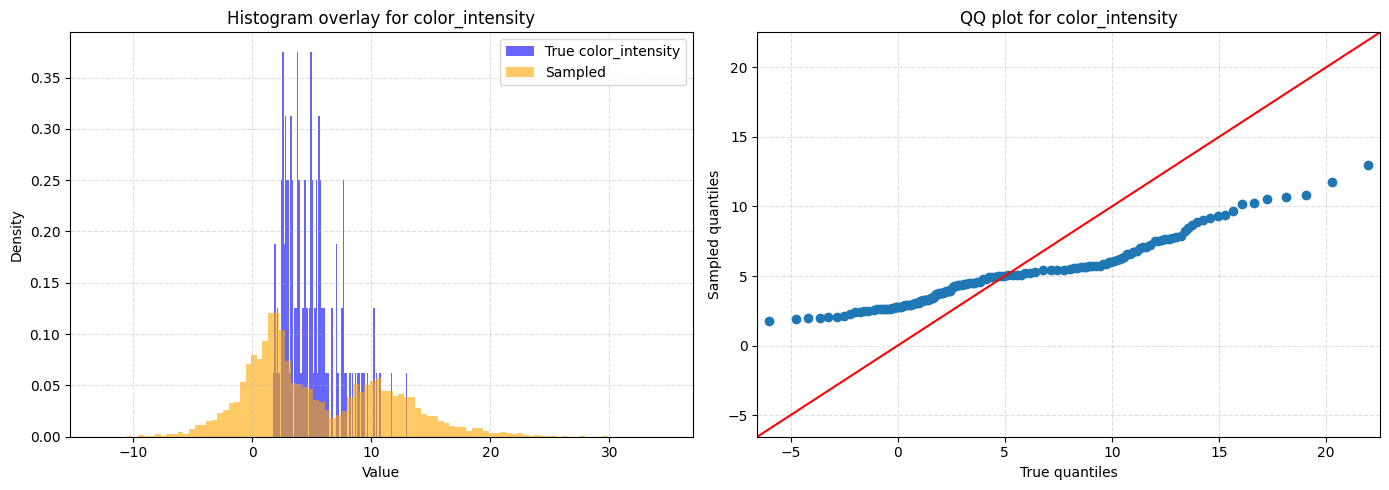

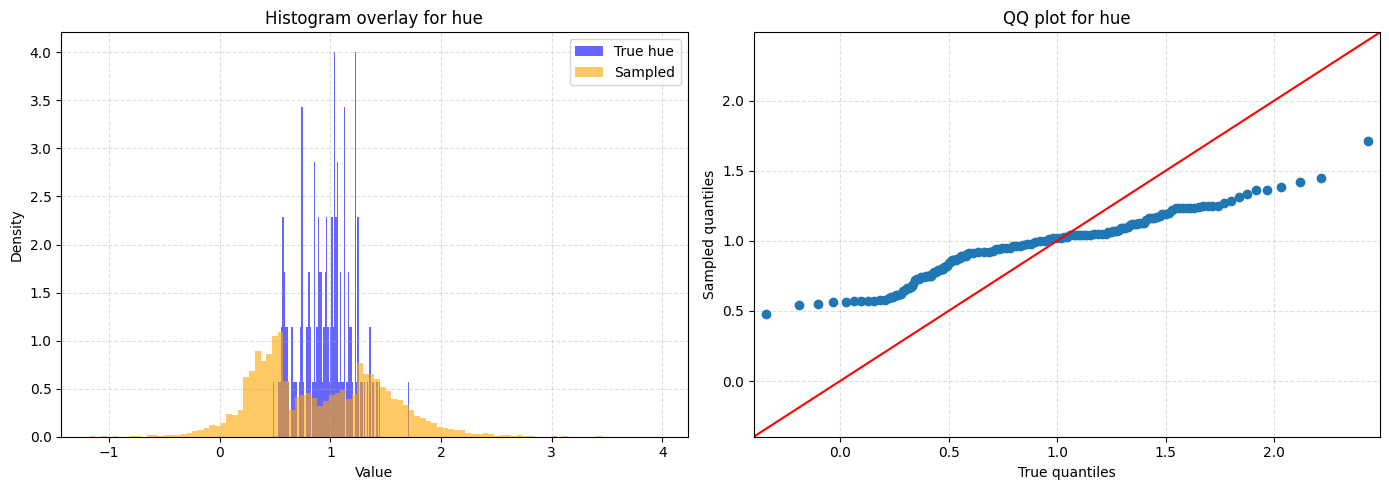

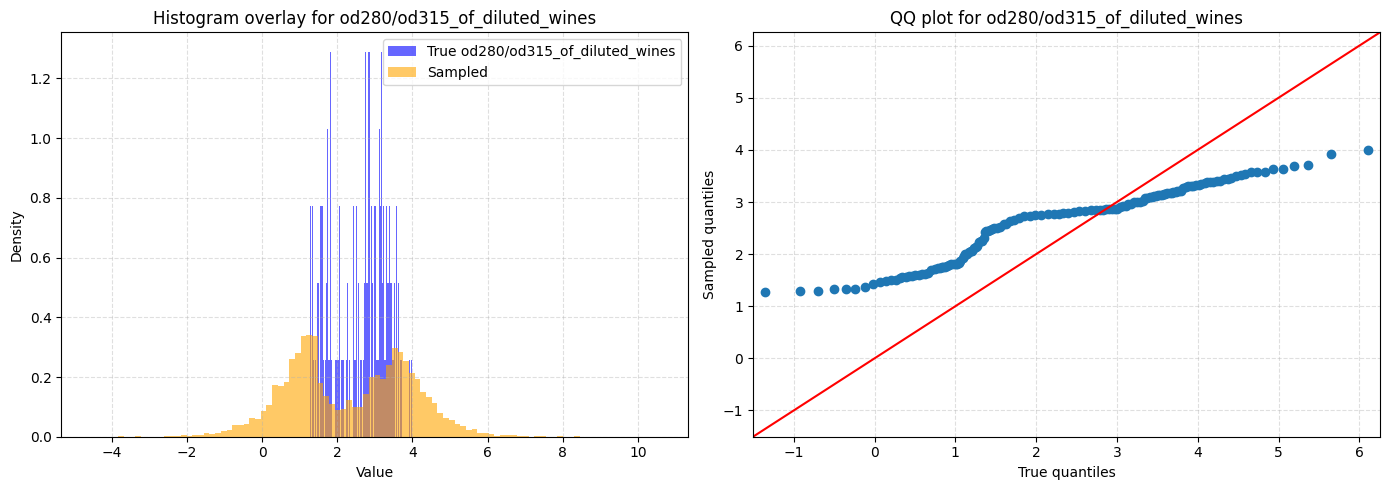

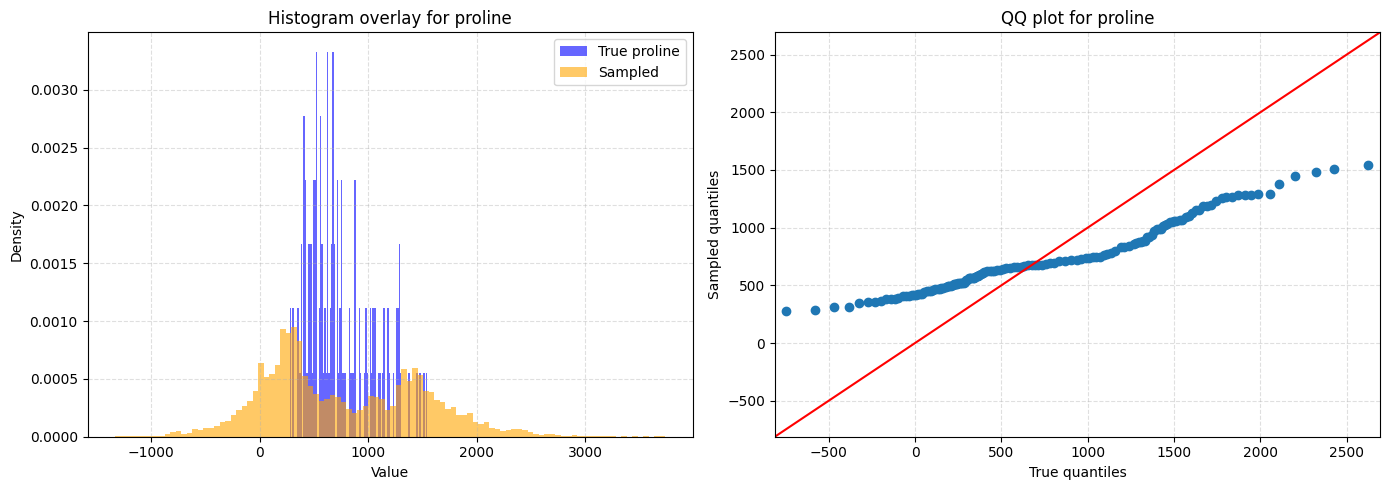

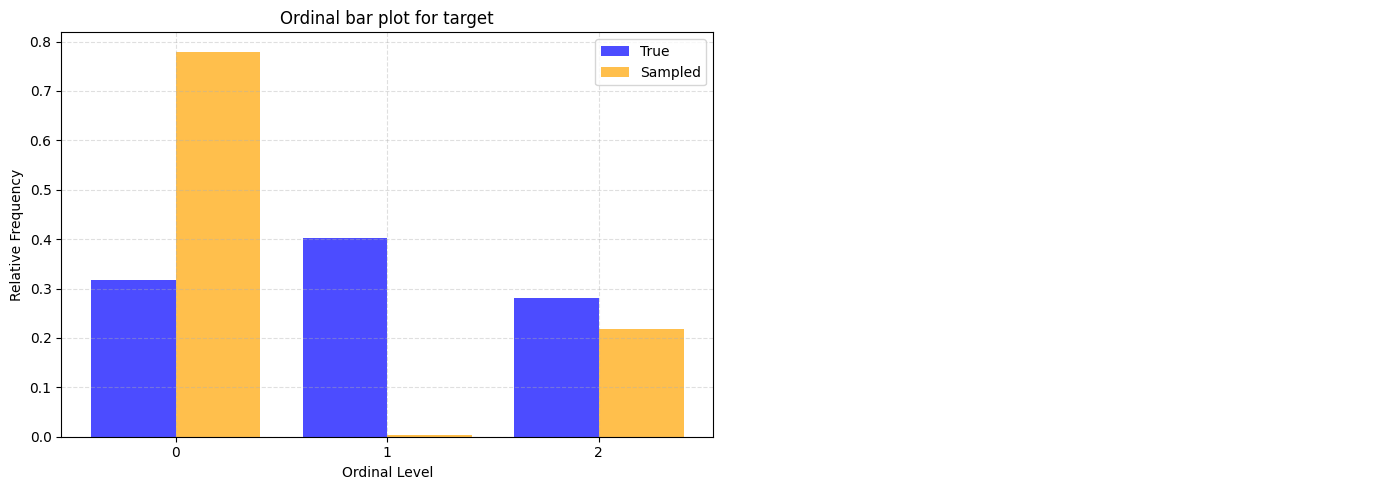

In [26]:
rsamples, latents = td_model.sample(number_of_samples=10_000)
td_model.plot_samples_vs_true(train_df,rsamples)